# Analysis of the Loan Data from Prosper by Barbara Stempien

## Table of Contents¶

* [Introduction](#Introduction)
* [Data Wrangling](#Data-Wrangling)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Conclusions](#Conclusions)


## Introduction

Prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [926]:
# load packages
library(ggplot2)
library(repr)
library(ggthemes)
library(dplyr)
library(maps)
library(mapdata)
library(openintro)
library(waffle)

# library(gridExtra)
# library(GGally)
# library(scales)
# library(memisc)
# library(RColorBrewer)
# library(bitops)
# library(RCurl)

In [694]:
# load the prosper loan dataset
loan_dataset <- read.csv('data/prosperLoanData.csv')

In [695]:
# display shape of dataset; rows x columns
dim(loan_dataset)

[1] 113937     81

In [696]:
# display few lines
head(loan_dataset)

ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0,0,0,0,1,0,0,0,258
10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,,36,Current,,0.12016,0.0920,0.0820,...,0.00,0,0,0,0,1,0,0,0,1
0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0,0,0,0,1,0,0,0,41
0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,,36,Current,,0.12528,0.0974,0.0874,...,-108.01,0,0,0,0,1,0,0,0,158
0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,,36,Current,,0.24614,0.2085,0.1985,...,-60.27,0,0,0,0,1,0,0,0,20
0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,,60,Current,,0.15425,0.1314,0.1214,...,-25.33,0,0,0,0,1,0,0,0,1


## Data Wrangling

In [697]:
# subset the dataframe to the following columns
subset <- c("ListingKey",
            "LoanStatus",
            "ListingCreationDate",
            "ClosedDate",
            "ListingCategory..numeric.",
            "Term",
            "BorrowerRate",
            "LoanOriginalAmount",
            "MonthlyLoanPayment",
            "BorrowerState",
            "IsBorrowerHomeowner",  
            "Occupation",
            "EmploymentStatus",
            "EmploymentStatusDuration",
            "StatedMonthlyIncome",
            "DebtToIncomeRatio",
            "ProsperRating..numeric.",
            "ProsperScore",           
            "CreditScoreRangeLower",
            "CreditScoreRangeUpper",
            "OpenCreditLines",
            "TotalCreditLinespast7years",
            "OpenRevolvingAccounts",
            "OpenRevolvingMonthlyPayment",
            "CurrentDelinquencies",
            "AmountDelinquent",
            "DelinquenciesLast7Years",
            "PublicRecordsLast10Years",
            "RevolvingCreditBalance",
            "BankcardUtilization",
            "TotalProsperLoans",
            "ProsperPrincipalBorrowed",
            "ProsperPrincipalOutstanding",
            "ProsperPaymentsLessThanOneMonthLate",
            "ProsperPaymentsOneMonthPlusLate"
           )

In [698]:
# subset dataframe
df <- loan_dataset[subset]

In [699]:
# replace NAs with 0
df[is.na(df)] <- 0

In [700]:
# display type of each variable
str(df)

'data.frame':	113937 obs. of  35 variables:
 $ ListingKey                         : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ LoanStatus                         : Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...
 $ ListingCreationDate                : Factor w/ 113064 levels "2005-11-09 20:44:28.847000000",..: 14184 111894 6429 64760 85967 100310 72556 74019 97834 97834 ...
 $ ClosedDate                         : Factor w/ 2803 levels "","2005-11-25 00:00:00",..: 1138 1 1263 1 1 1 1 1 1 1 ...
 $ ListingCategory..numeric.          : int  0 2 0 16 2 1 1 2 7 7 ...
 $ Term                               : int  36 36 36 36 36 60 36 36 36 36 ...
 $ BorrowerRate                       : num  0.158 0.092 0.275 0.0974 0.2085 ...
 $ LoanOriginalAmount                 : int  9425 10000 3001 10000 15000 15000 3000 10000 10000 10000 ...
 $ MonthlyLoanPayment                 : num  330 319 123 321 564 ...
 $ B

In [701]:
# Loan Status variable 
table(df$LoanStatus)

# convert Loan Status to factor with 7 levels
levels(df$LoanStatus) <- list(Current = "Current",
                              Completed = "Completed",
                              "Charged Off" = "Chargedoff",
                              Defaulted = "Defaulted",
                              "Past Due" = c("Past Due (>120 days)",
                                        "Past Due (1-15 days)",
                                        "Past Due (16-30 days)",
                                        "Past Due (31-60 days)",
                                        "Past Due (61-90 days)",
                                        "Past Due (91-120 days)"),
                              "Final Payment" = "FinalPaymentInProgress",
                              Cancelled = "Cancelled")


             Cancelled             Chargedoff              Completed 
                     5                  11992                  38074 
               Current              Defaulted FinalPaymentInProgress 
                 56576                   5018                    205 
  Past Due (>120 days)   Past Due (1-15 days)  Past Due (16-30 days) 
                    16                    806                    265 
 Past Due (31-60 days)  Past Due (61-90 days) Past Due (91-120 days) 
                   363                    313                    304 

In [702]:
# convert Listing Creation Date variable to date format
df$ListingCreationDate <- as.Date(df$ListingCreationDate)

In [703]:
# Term variable 
table(df$Term)

# convert term to ordered factor with 3 levels
df$Term <- factor(df$Term, levels=c(12,36,60), ordered=TRUE)


   12    36    60 
 1614 87778 24545 

In [704]:
# convert Closed Date variable to date format
df$ClosedDate <- as.Date(df$ClosedDate)

In [705]:
# Prosper Rating variable 
table(df$ProsperRating)

# convert Prosper Rating to ordered factor with 8 levels
df$ProsperRating..numeric. <- factor(df$ProsperRating..numeric., levels=c(0,1,2,3,4,5,6,7), ordered=TRUE)


    0     1     2     3     4     5     6     7 
29084  6935  9795 14274 18345 15581 14551  5372 

In [706]:
# Prosper Score variable 
table(df$ProsperScore)

# convert Prosper Score to ordered factor with 12 levels
df$ProsperScore <- factor(df$ProsperScore, levels=c(0,1,2,3,4,5,6,7,8,9,10,11), ordered=TRUE)


    0     1     2     3     4     5     6     7     8     9    10    11 
29084   992  5766  7642 12595  9813 12278 10597 12053  6911  4750  1456 

In [707]:
# Listing Category variable
table(df$ListingCategory..numeric.)

# add column with Listing Category labels based on the documentation
df$ListingCategory <- factor(df$ListingCategory..numeric., labels=c('Not Available',
                                                                    'Debt Consolidation',
                                                                    'Home Improvement',
                                                                    'Business',
                                                                    'Personal Loan',
                                                                    'Student Use',
                                                                    'Auto',
                                                                    'Other',
                                                                    'Baby&Adoption',
                                                                    'Boat',
                                                                    'Cosmetic Procedure',
                                                                    'Engagement Ring',
                                                                    'Green Loans',
                                                                    'Household Expenses',
                                                                    'Large Purchases',
                                                                    'Medical/Dental',
                                                                    'Motorcycle',
                                                                    'RV',
                                                                    'Taxes',
                                                                    'Vacation',
                                                                    'Wedding Loans'))

# move ListingCategory column next to the ListingCategory..numeric.
df <- df[c(1:5,36,6:35)]


    0     1     2     3     4     5     6     7     8     9    10    11    12 
16965 58308  7433  7189  2395   756  2572 10494   199    85    91   217    59 
   13    14    15    16    17    18    19    20 
 1996   876  1522   304    52   885   768   771 

In [708]:
# Borrower State variable
table(df$BorrowerState)

# convert State abbreviation to full name
df$BorrowerState <- abbr2state(df$BorrowerState)


         AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA    HI 
 5515   200  1679   855  1901 14717  2210  1627   382   300  6720  5008   409 
   IA    ID    IL    IN    KS    KY    LA    MA    MD    ME    MI    MN    MO 
  186   599  5921  2078  1062   983   954  2242  2821   101  3593  2318  2615 
   MS    MT    NC    ND    NE    NH    NJ    NM    NV    NY    OH    OK    OR 
  787   330  3084    52   674   551  3097   472  1090  6729  4197   971  1817 
   PA    RI    SC    SD    TN    TX    UT    VA    WA    WI    VT    WV    WY 
 2972   435  1122   189  1737  6842   877  3278  3048  1842   207   391   150 

In [709]:
# Is Borrower Homeowner variable
table(df$IsBorrowerHomeowner)

# convert Is Borrower Homeowner to logical type
df$IsBorrowerHomeowner <- as.logical(df$IsBorrowerHomeowner)


False  True 
56459 57478 

In [710]:
# display type of each variable
str(df)

'data.frame':	113937 obs. of  36 variables:
 $ ListingKey                         : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ LoanStatus                         : Factor w/ 7 levels "Current","Completed",..: 2 1 2 1 1 1 1 1 1 1 ...
 $ ListingCreationDate                : Date, format: "2007-08-26" "2014-02-27" ...
 $ ClosedDate                         : Date, format: "2009-08-14" NA ...
 $ ListingCategory..numeric.          : int  0 2 0 16 2 1 1 2 7 7 ...
 $ ListingCategory                    : Factor w/ 21 levels "Not Available",..: 1 3 1 17 3 2 2 3 8 8 ...
 $ Term                               : Ord.factor w/ 3 levels "12"<"36"<"60": 2 2 2 2 2 3 2 2 2 2 ...
 $ BorrowerRate                       : num  0.158 0.092 0.275 0.0974 0.2085 ...
 $ LoanOriginalAmount                 : int  9425 10000 3001 10000 15000 15000 3000 10000 10000 10000 ...
 $ MonthlyLoanPayment                 : num  330 319 123 321 564 ...
 $ Borr

In [711]:
# display few lines of new dataset
head(df)

ListingKey,LoanStatus,ListingCreationDate,ClosedDate,ListingCategory..numeric.,ListingCategory,Term,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,...,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
1021339766868145413AB3B,Completed,2007-08-26,2009-08-14,0,Not Available,36,0.1580,9425,330.43,...,472,4,0,0,0.00,0,0,0.0,0,0
10273602499503308B223C1,Current,2014-02-27,NA,2,Home Improvement,36,0.0920,10000,318.93,...,0,0,1,3989,0.21,0,0,0.0,0,0
0EE9337825851032864889A,Completed,2007-01-05,2009-12-17,0,Not Available,36,0.2750,3001,123.32,...,0,0,0,0,0.00,0,0,0.0,0,0
0EF5356002482715299901A,Current,2012-10-22,NA,16,Motorcycle,36,0.0974,10000,321.45,...,10056,14,0,1444,0.04,0,0,0.0,0,0
0F023589499656230C5E3E2,Current,2013-09-14,NA,2,Home Improvement,36,0.2085,15000,563.97,...,0,0,0,6193,0.81,1,11000,9947.9,0,0
0F05359734824199381F61D,Current,2013-12-14,NA,1,Debt Consolidation,60,0.1314,15000,342.37,...,0,0,0,62999,0.39,0,0,0.0,0,0


## Exploratory Data Analysis

In [712]:
# change size of plots
options(repr.plot.width=12, repr.plot.height=6)

# set theme
theme_set(theme_classic())

In [839]:
head(df)

ListingKey,LoanStatus,ListingCreationDate,ClosedDate,ListingCategory..numeric.,ListingCategory,Term,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,...,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,TotalProsperLoans,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
1021339766868145413AB3B,Completed,2007-08-26,2009-08-14,0,Not Available,36,0.1580,9425,330.43,...,472,4,0,0,0.00,0,0,0.0,0,0
10273602499503308B223C1,Current,2014-02-27,NA,2,Home Improvement,36,0.0920,10000,318.93,...,0,0,1,3989,0.21,0,0,0.0,0,0
0EE9337825851032864889A,Completed,2007-01-05,2009-12-17,0,Not Available,36,0.2750,3001,123.32,...,0,0,0,0,0.00,0,0,0.0,0,0
0EF5356002482715299901A,Current,2012-10-22,NA,16,Motorcycle,36,0.0974,10000,321.45,...,10056,14,0,1444,0.04,0,0,0.0,0,0
0F023589499656230C5E3E2,Current,2013-09-14,NA,2,Home Improvement,36,0.2085,15000,563.97,...,0,0,0,6193,0.81,1,11000,9947.9,0,0
0F05359734824199381F61D,Current,2013-12-14,NA,1,Debt Consolidation,60,0.1314,15000,342.37,...,0,0,0,62999,0.39,0,0,0.0,0,0


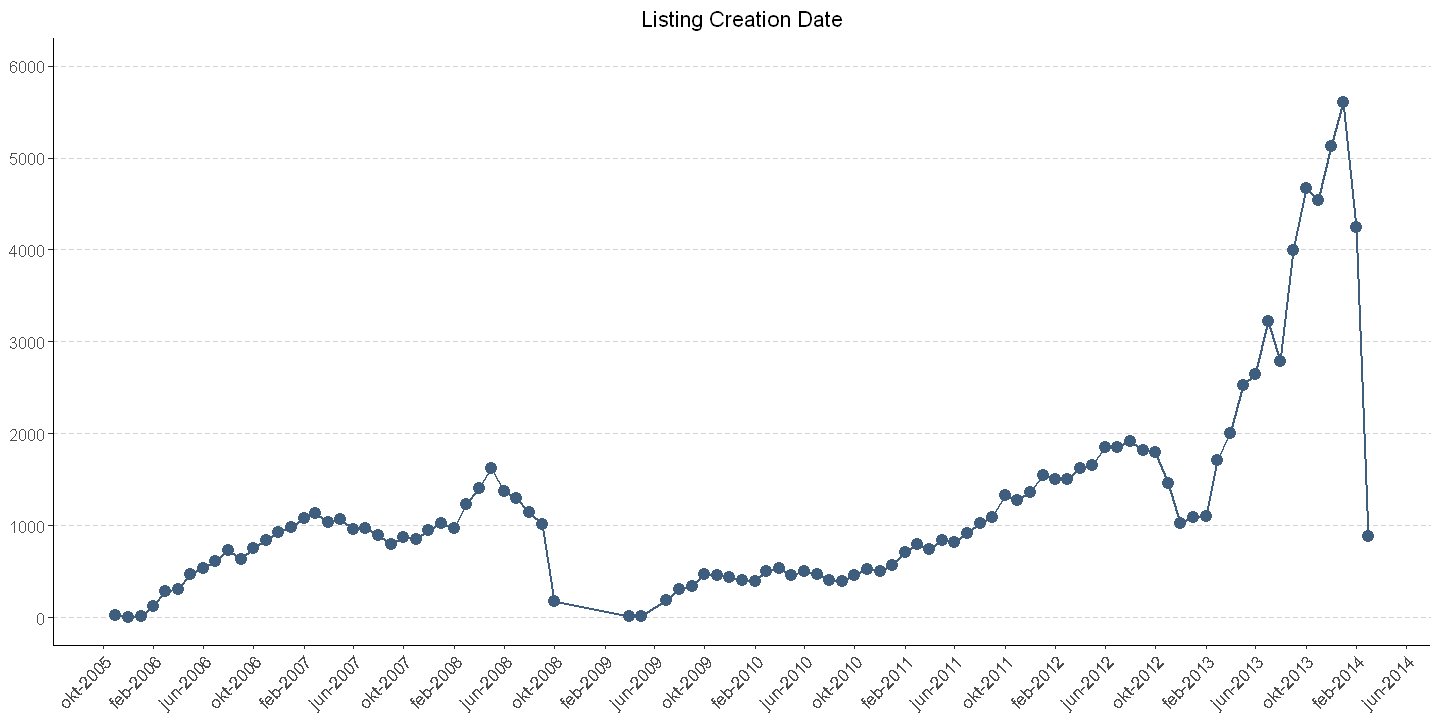

In [838]:
# Group Listings by year and month
creation_date <- df %>% count(df$ListingCreationDate) %>%
                set_colnames(c("date", "count")) %>%
                mutate(month = as.Date(cut(date, breaks = "month"))) %>%
                group_by(month) %>% 
                summarise(total = sum(count)) 

# Plot Listing Creation Date
ggplot(creation_date3, aes(x=month, y=total)) +
      geom_line(color = "#3F5D7D", size = 0.75) + 
      geom_point(color = "#3F5D7D", size = 3) +
      scale_x_date(date_labels = "%b-%Y", date_breaks="4 months") +
      labs(title = "Listing Creation Date") + 
      scale_y_continuous(limits = c(0,6000), breaks = seq(0, 6000, 1000)) +
      theme(plot.title = element_text(hjust = 0.5),
            axis.title.x = element_blank(),
            axis.title.y = element_blank(),
            axis.text.y = element_text(size=10),
            axis.text.x = element_text(angle = 45, hjust = 1, size=10),
            panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

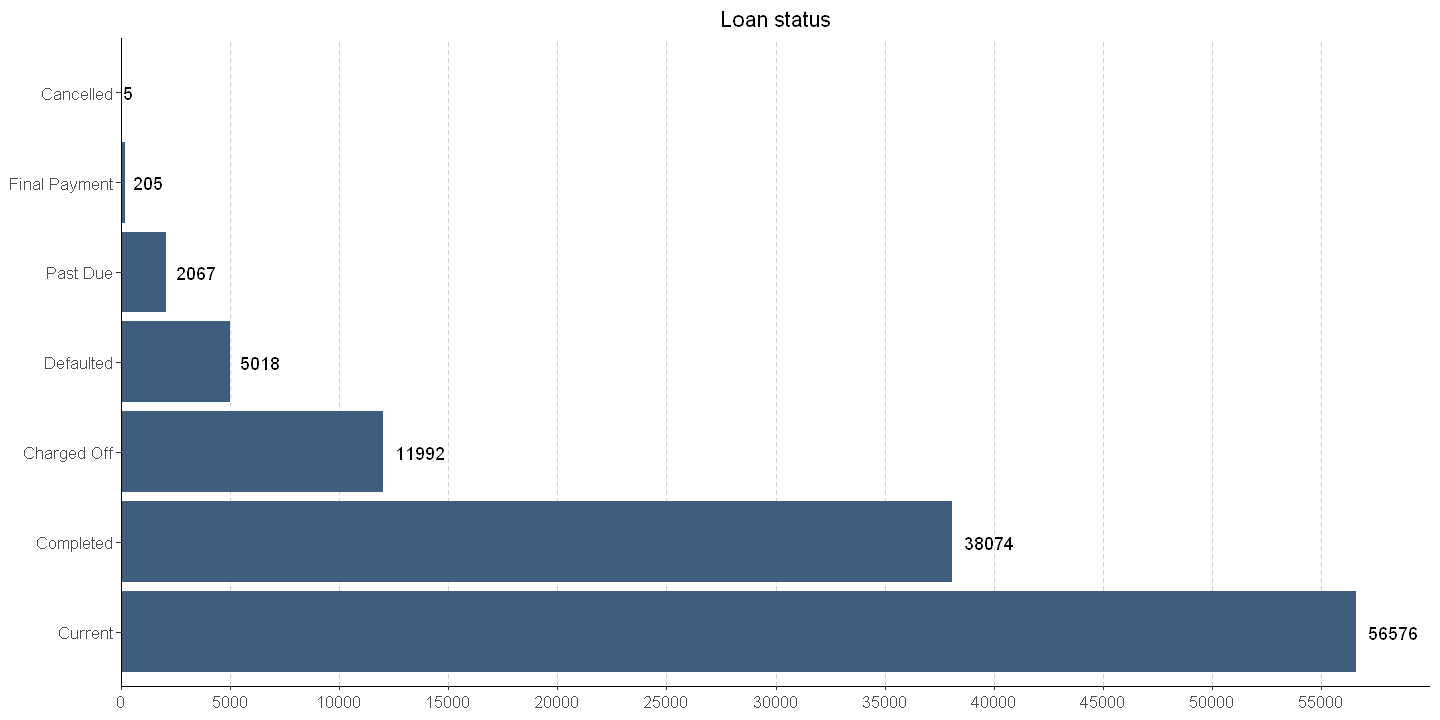

In [811]:
# Loan Status 
loan_status <- df %>% count(df$LoanStatus) %>%
                set_colnames(c("status", "count"))

# plot loan status
ggplot(loan_status, aes(x = status, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), hjust = -0.25) +
  labs(title = "Loan status") + 
  scale_y_continuous(limits = c(0,60000), breaks = seq(0, 55000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(size=10),
        panel.grid.major.x = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  rotate()

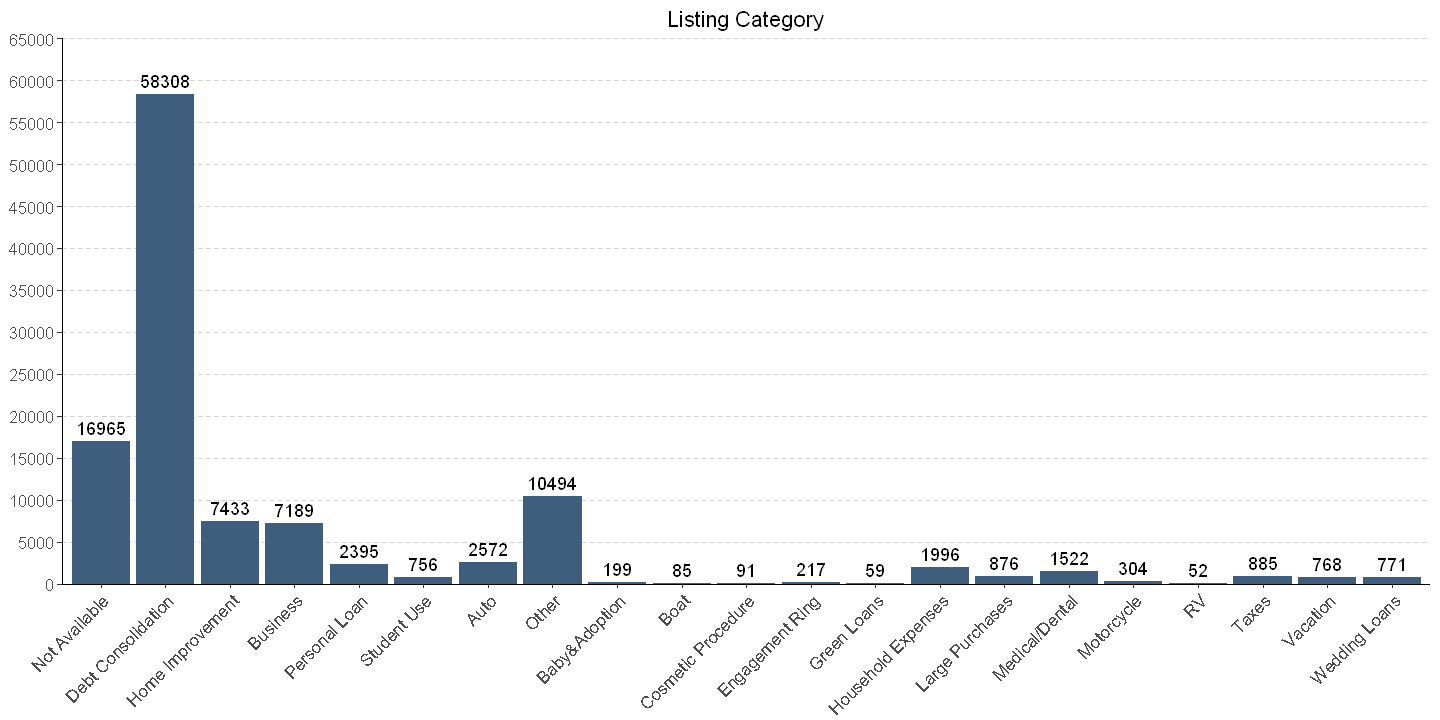

In [869]:
# Listing Category
listing_category <- df %>% count(df$ListingCategory) %>%
                    set_colnames(c("category", "count"))

# plot listing category
ggplot(listing_category, aes(x = category, y = count)) +
  geom_bar(fill = "#3F5D7D", stat = "identity") +
  geom_text(aes(label = count), vjust = -0.5) +
  labs(title = "Listing Category") + 
  scale_y_continuous(limits = c(0,65000), breaks = seq(0, 65000, 5000), expand = c(0,0)) +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5))

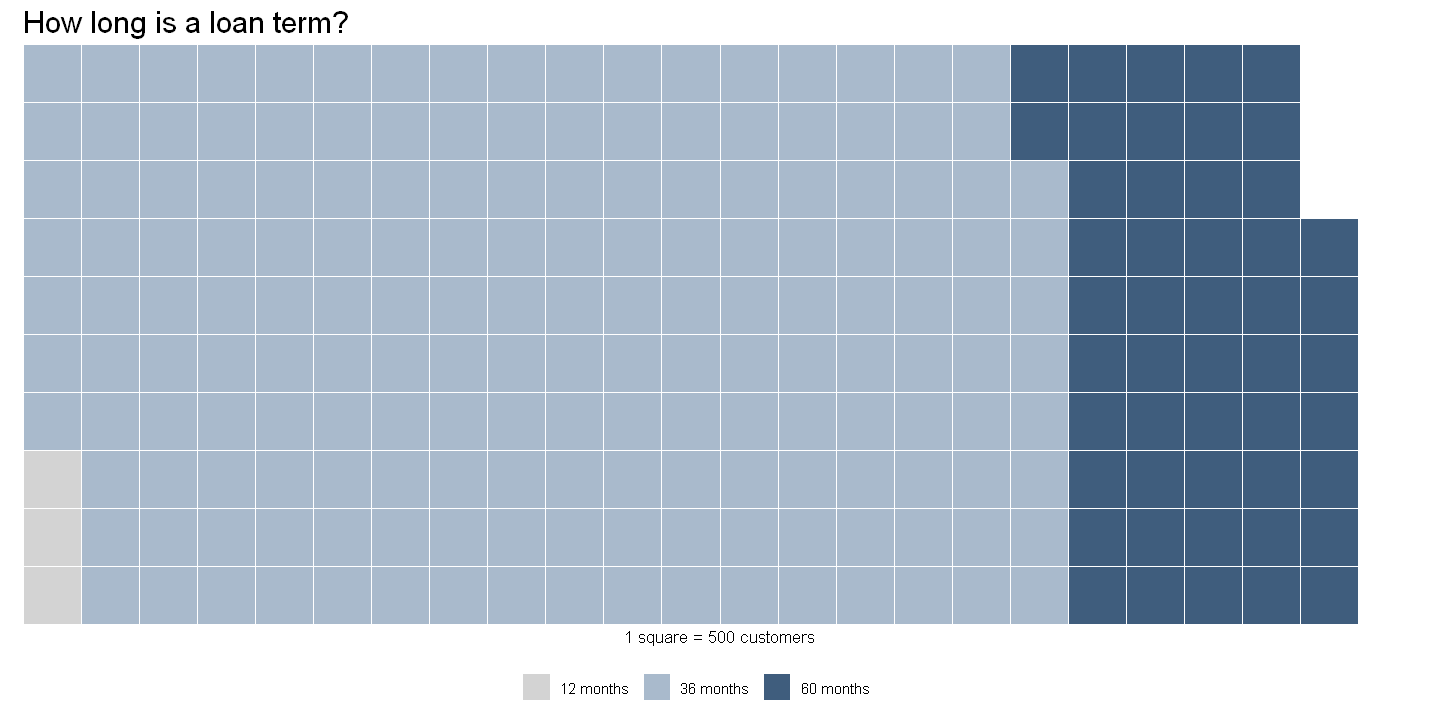

In [1010]:
# Term
term <- df %>% count(df$Term) %>%
                    set_colnames(c("term", "count"))
# plot home ownership
waffle(c("12 months" = term$count[term$term == 12] / 500, 
         "36 months" = term$count[term$term == 36] / 500,
         "60 months" = term$count[term$term == 60] / 500),
       rows = 10, 
       colors = c("#d3d3d3", "#a9bacc", "#3F5D7D"), 
       size = 0.5, 
       pad = 1, 
       legend_pos = "bottom", 
       title = "How long is a loan term?",
       xlab = "1 square = 500 customers")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1340  0.1840  0.1928  0.2500  0.4975 

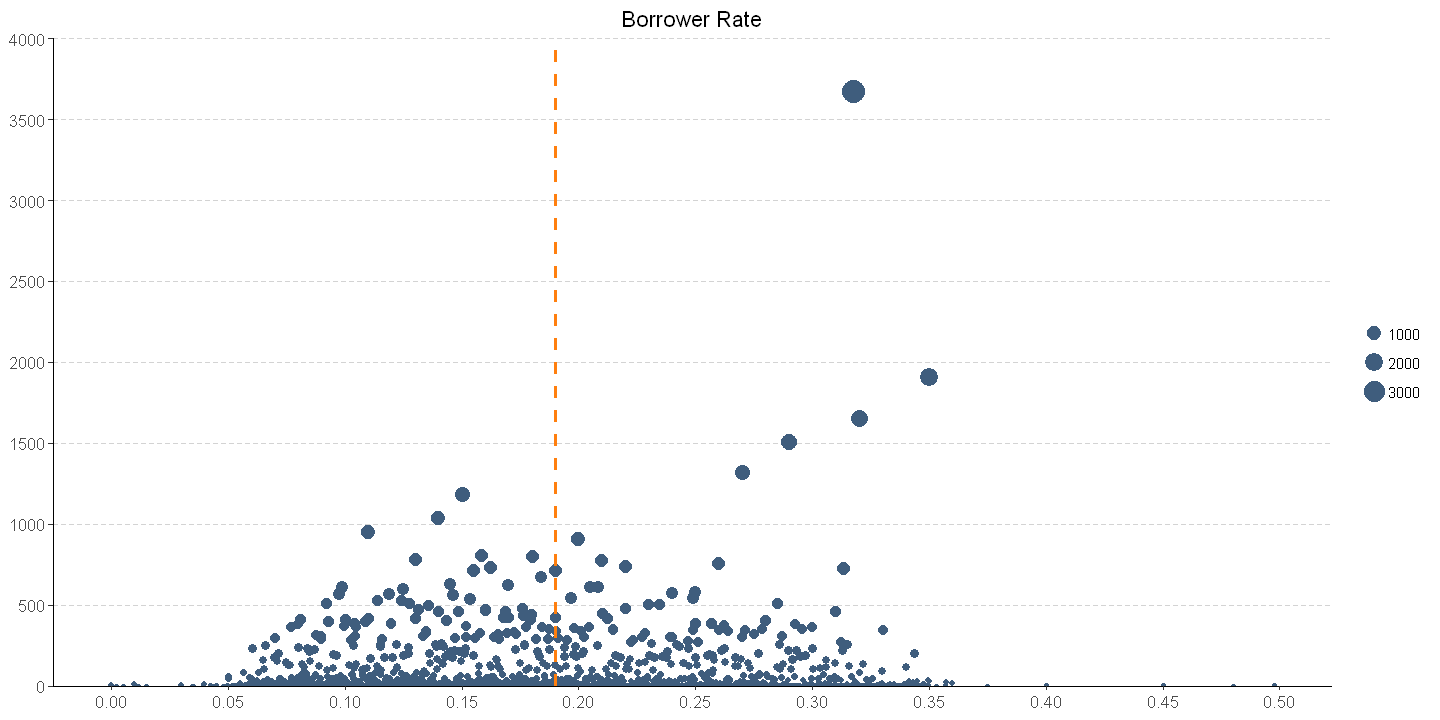

In [909]:
# Borrower Rate
summary(df$BorrowerRate)
        
borrower_rate <- df %>% count(df$BorrowerRate) %>%
                    set_colnames(c("rate", "count"))

ggplot(borrower_rate, aes(x = rate, y = count)) +
  geom_point(aes(size = count), color = "#3F5D7D") +
  labs(title = "Borrower Rate") + 
  scale_y_continuous(limits = c(0,4000), breaks = seq(0, 4000, 500), expand = c(0,0)) +
  scale_x_continuous(breaks = seq(0, 0.5, 0.05)) +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_blank(),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) +
  geom_vline(aes(xintercept = mean(rate)),
            color = "#ff7f0e", linetype = "dashed", size = 1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000    4000    6500    8337   12000   35000 

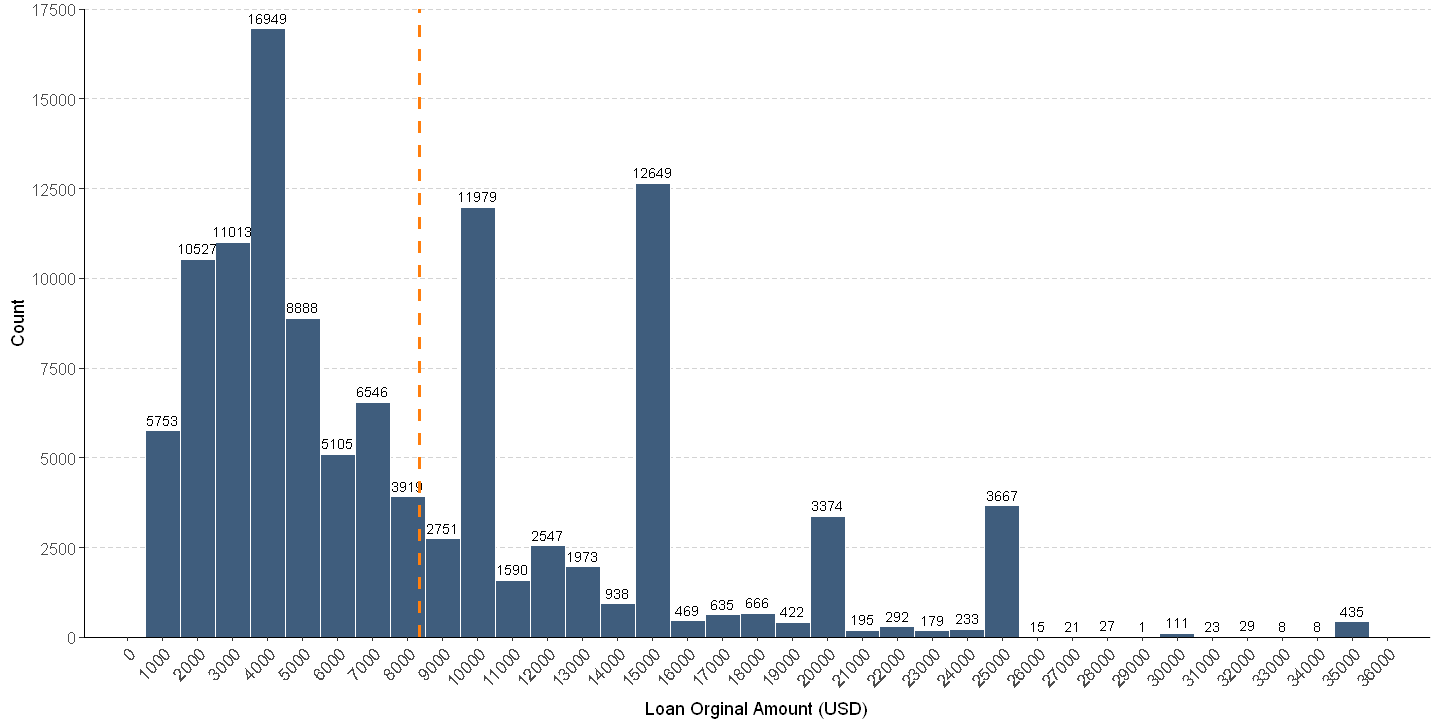

In [832]:
# Loan Original Amount statistics
summary(df$LoanOriginalAmount)

# plot Loan Original Amount
ggplot(aes(x = LoanOriginalAmount), data = df) +
  geom_histogram(binwidth = 1000, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 1000, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(breaks = seq(0, 36000, 1000)) +
  scale_y_continuous(limits = c(0,17500), breaks = seq(0, 17500, 2500), expand = c(0,0)) +
  labs(x = "Loan Orginal Amount (USD)", y = "Count") + 
  theme(axis.title.x = element_text(vjust = -1),
        axis.title.y = element_text(vjust = 1),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(LoanOriginalAmount)),
            color = "#ff7f0e", linetype = "dashed", size = 1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   131.6   217.7   272.5   371.6  2251.5 

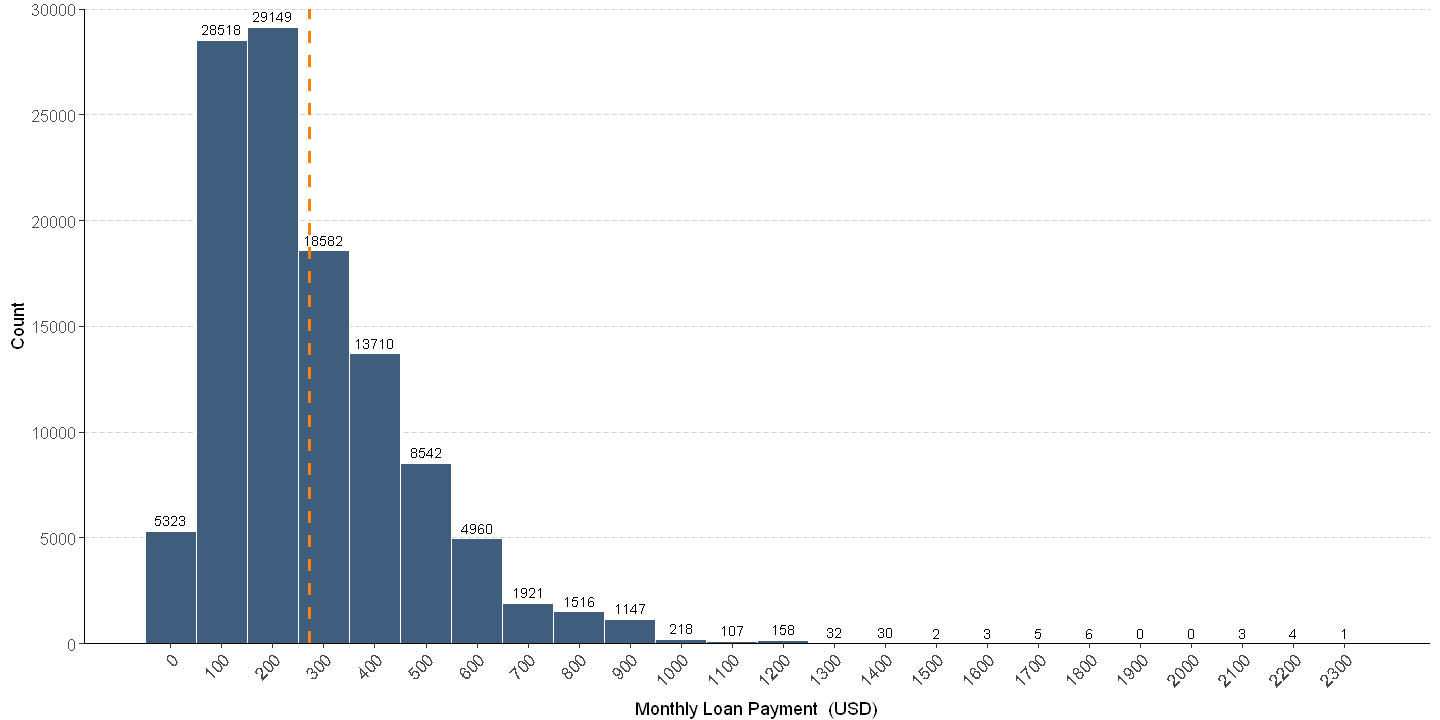

In [834]:
# Monthly Loan Payment statistics
summary(df$MonthlyLoanPayment)

# plot Monthly Loan Payment 
ggplot(aes(x = MonthlyLoanPayment), data = df) +
  geom_histogram(binwidth = 100, color = "#ffffff", fill = "#3F5D7D") +
  stat_bin(binwidth = 100, aes(y=..count.., label=..count..,), geom="text", vjust=-.5, size=3) +
  scale_x_continuous(breaks = seq(0, 2300, 100)) +
  scale_y_continuous(limits = c(0,30000), breaks = seq(0, 30000, 5000), expand = c(0,0)) +
  labs(x = "Monthly Loan Payment  (USD)", y = "Count") + 
  theme(axis.title.x = element_text(vjust = -1),
        axis.title.y = element_text(vjust = 1),
        axis.text.y = element_text(size=10),
        axis.text.x = element_text(angle = 45, hjust = 1, size=10),
        panel.grid.major.y = element_line(color="#d3d3d3", linetype = "dashed", size=0.5)) + 
  geom_vline(aes(xintercept = mean(MonthlyLoanPayment)),
            color = "#ff7f0e", linetype = "dashed", size = 1)

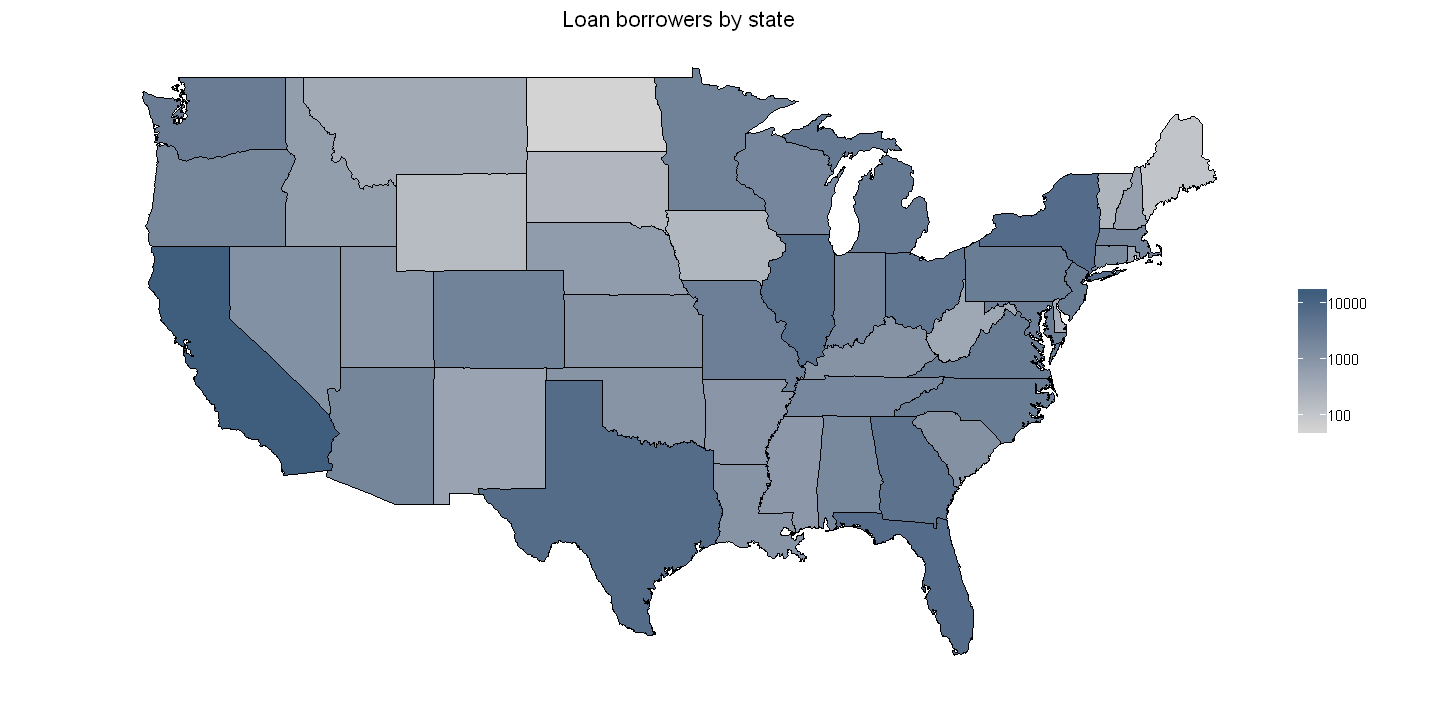

In [911]:
# group loans by borrower's state
loans <- df %>% count(df$BorrowerState) %>%
                set_colnames(c("region", "count"))
loans$region <- tolower(loans$region)

# get polygon data for states
states <- map_data("state")

# merge datasets
loans_states <- inner_join(states, loans, by = "region")

# plot borrowers by state
ggplot(data = loans_states, mapping = aes(x = long, y = lat, group = group)) + 
  coord_fixed(1.3) + 
  geom_polygon(color = "#000000", fill = "#d3d3d3") + 
  geom_polygon(data = loans_states, aes(fill = count), color = "#ffffff") +
  geom_polygon(color = "#000000", fill = NA) +
  labs(title = "Loan borrowers by state", x="", y="") + 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        legend.title = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank()) + 
  scale_fill_gradient(trans = "log10", low = "#d3d3d3", high = "#3F5D7D")

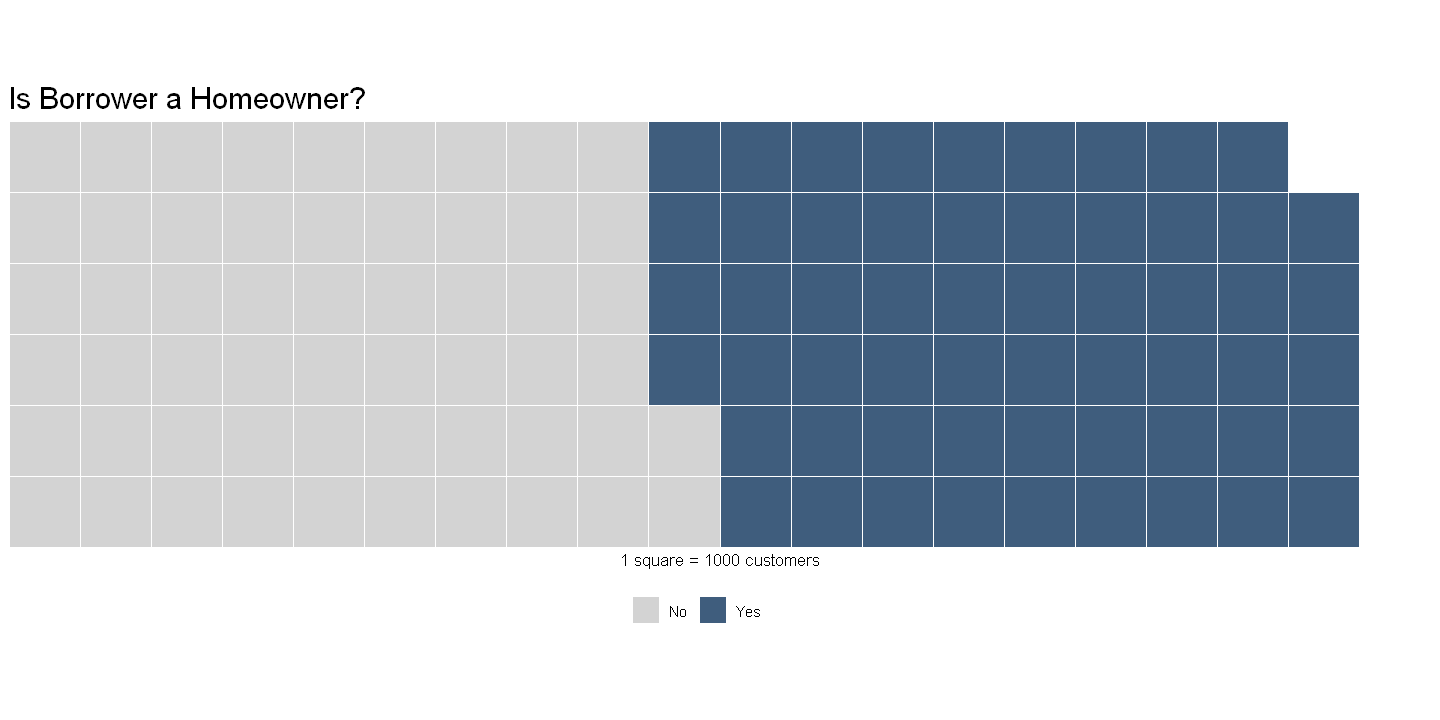

In [980]:
# IsBorrowerHomeowner variable
homeowner <- df %>% count(df$IsBorrowerHomeowner) %>%
                set_colnames(c("owner", "count"))

# plot home ownership
waffle(c(No = homeowner$count[homeowner$owner == "FALSE"] / 1000, 
         Yes = homeowner$count[homeowner$owner == "TRUE"] / 1000), 
       rows = 6, 
       colors = c("#d3d3d3","#3F5D7D"), 
       size = 0.5, pad = 1, 
       legend_pos = "bottom", 
       title = "Is Borrower a Homeowner?",
       xlab = "1 square = 1000 customers")

Resources

[Beautiful plotting in R: A ggplot2 cheatsheet](http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/)  
[Making Maps with R](http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html)